___
# Capítulo 5 - Análise de outliers
## Seção 1 - Análise de valores extremos usando métodos univariados
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

### Usando boxplots para identificar outliers

<AxesSubplot:>

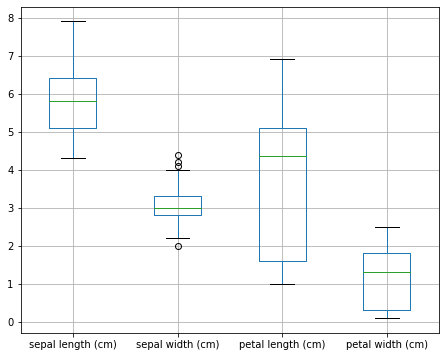

In [2]:
df.boxplot()

In [3]:
larg_cepa = df['sepal width (cm)']
iris_outliers = larg_cepa > 4
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [4]:
iris_outliers = larg_cepa < 2.05
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0


### Aplicando a identificação de outlier de Tukey

In [5]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(df['sepal width (cm)'])
sumario = X_df.describe()
print(sumario)

       sepal width (cm)
count            150.00
mean               3.06
std                0.44
min                2.00
25%                2.80
50%                3.00
75%                3.30
max                4.40


#### Calculando os limites inferior e superior do Intervalo entre quartis

In [7]:
iqr = sumario.loc['75%'] - sumario.loc['25%']
iqr

sepal width (cm)   0.50
dtype: float64

In [8]:
limite_inf = sumario.loc['25%'] - iqr * 1.5
limite_inf

sepal width (cm)   2.05
dtype: float64

In [9]:
limite_sup = sumario.loc['75%'] + iqr * 1.5
limite_sup

sepal width (cm)   4.05
dtype: float64